<a href="https://colab.research.google.com/github/AdammGreen/Social-Media-Analysis-Python-/blob/main/MySocialMediaAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

init_notebook_mode(connected=True) #do not miss this line

import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 38.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

In [ ]:
datafile = 'test_file.csv'

In [ ]:
import pandas as pd
news = pd.read_csv(datafile, encoding='latin1')
news = news.assign(PublishDate=pd.to_datetime(news.PublishDate)).drop('IDLink', axis='columns')

print("Number of news: ",len(news['Title']))
news.head(5)

Number of news:  37288


,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn
0,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29 01:41:12,0,0,1
1,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,Daily Mail,microsoft,2016-03-29 01:41:27,121,2,13
2,"Microsoftâs Twitter Robot Praises Hitler, Tr...",* Microsoft teamed with Bing to create TayTwee...,EURweb,microsoft,2016-03-29 01:47:00,12,1,0
3,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29 02:00:00,0,0,3
4,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29 02:01:07,3,0,0


In [ ]:
'''import plotly.plotly as py
import plotly.graph_objs as go
'''
news['PublishDate'] = pd.to_datetime(news['PublishDate'], format='%y-%m-%d %H:%M:%S')
newsT = news['PublishDate']

trace = go.Histogram(
    x=newsT,
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='News Activity Over Years',
    height=450,
    width=1200,
    xaxis=dict(
        title='Month and year'
    ),
    yaxis=dict(
        title='News Quantity'
    ),
    bargap=0.2,
)

data = [trace]

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Assuming you have defined your 'data' and 'layout' somewhere in the code

# Create a Figure
fig = go.Figure(data=data, layout=layout)

# Display the plot in Colab
pio.show(fig, renderer='colab')

In [ ]:
corpus=[]
a=[]
for i in range(len(news['Title'])):
        a=news['Title'][i]
        corpus.append(a)

corpus[0:10]

['Sliding Economy: FG fights back with N3trn TSA funds',
 'Microsoft shows how HoloLens can bring distant family members ...',
 'Microsoftâ\x80\x99s Twitter Robot Praises Hitler, Trump & Recites Racism',
 "Flood of Central Bank Moves Can't Get World Economy Out of Rut",
 'USD/JPY: bears lining up on mixed U.S. economy outlook',
 "Obama Slams 'Divisive' and 'Vulgar' Rhetoric of 2016 Campaign",
 'President Obama rails against vulgar politics at Syracuse University ...',
 "The Young Woman Whose Addiction Story Touched Obama's Heart ...",
 "Politics|Hillary Clinton Attacks GOP for Not Acting on Obama's ...",
 "Looking In: Here's five ways to advance NM economy"]

In [ ]:
news.head(5)

,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn
0,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29 01:41:12,0,0,1
1,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,Daily Mail,microsoft,2016-03-29 01:41:27,121,2,13
2,"Microsoftâs Twitter Robot Praises Hitler, Tr...",* Microsoft teamed with Bing to create TayTwee...,EURweb,microsoft,2016-03-29 01:47:00,12,1,0
3,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29 02:00:00,0,0,3
4,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29 02:01:07,3,0,0


In [ ]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/tmp" will be used to save temporary dictionary and corpus.


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# removing common words and tokenizing
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'news.dict'))  # store the dictionary, for future reference

#print(dictionary)
#print(dictionary.token2id)

In [ ]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'news.mm'), corpus)  # store to disk, for later use

In [ ]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

In [ ]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

In [ ]:
total_topics = 5

In [ ]:
lda = gensim.models.LdaMulticore(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

In [ ]:
#Show first n important word in the topics:
lda.show_topics(total_topics,5)

[(0,
  '0.067*"economy" + 0.045*"obama" + 0.026*"..." + 0.025*"brexit" + 0.013*"says"'),
 (1,
  '0.049*"..." + 0.033*"microsoft" + 0.024*"obama" + 0.019*"obama\'s" + 0.015*"new"'),
 (2,
  '0.056*"..." + 0.052*"obama" + 0.016*"president" + 0.015*"microsoft" + 0.013*"palestine"'),
 (3,
  '0.053*"economy" + 0.025*"..." + 0.015*"windows" + 0.014*"10" + 0.012*"obama"'),
 (4,
  '0.095*"microsoft" + 0.019*"..." + 0.009*"microsoft\'s" + 0.008*"economy" + 0.007*"new"')]

In [ ]:
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
#data_lda

In [ ]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(5, 84)


In [ ]:
df_lda

,economy,obama,...,brexit,says,global,us,uk,trump,clinton,...,june,"microsoft,",azure,google,support,billion,2,deal,enterprise,band
0,0.067205,0.044764,0.025828,0.02469,0.012959,0.009725,0.009251,0.0084,0.006467,0.006277,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.007376,0.024335,0.048967,0.00000,0.000000,0.000000,0.000000,0.0000,0.002885,0.005775,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.004565,0.051567,0.056428,0.00000,0.000000,0.000000,0.000000,0.0000,0.004598,0.003767,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.053191,0.011704,0.025295,0.00000,0.000000,0.000000,0.010180,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.007665,0.000000,0.019364,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.003888,0.003462,0.003363,0.003248,0.00322,0.003171,0.003128,0.003087,0.00295,0.002905


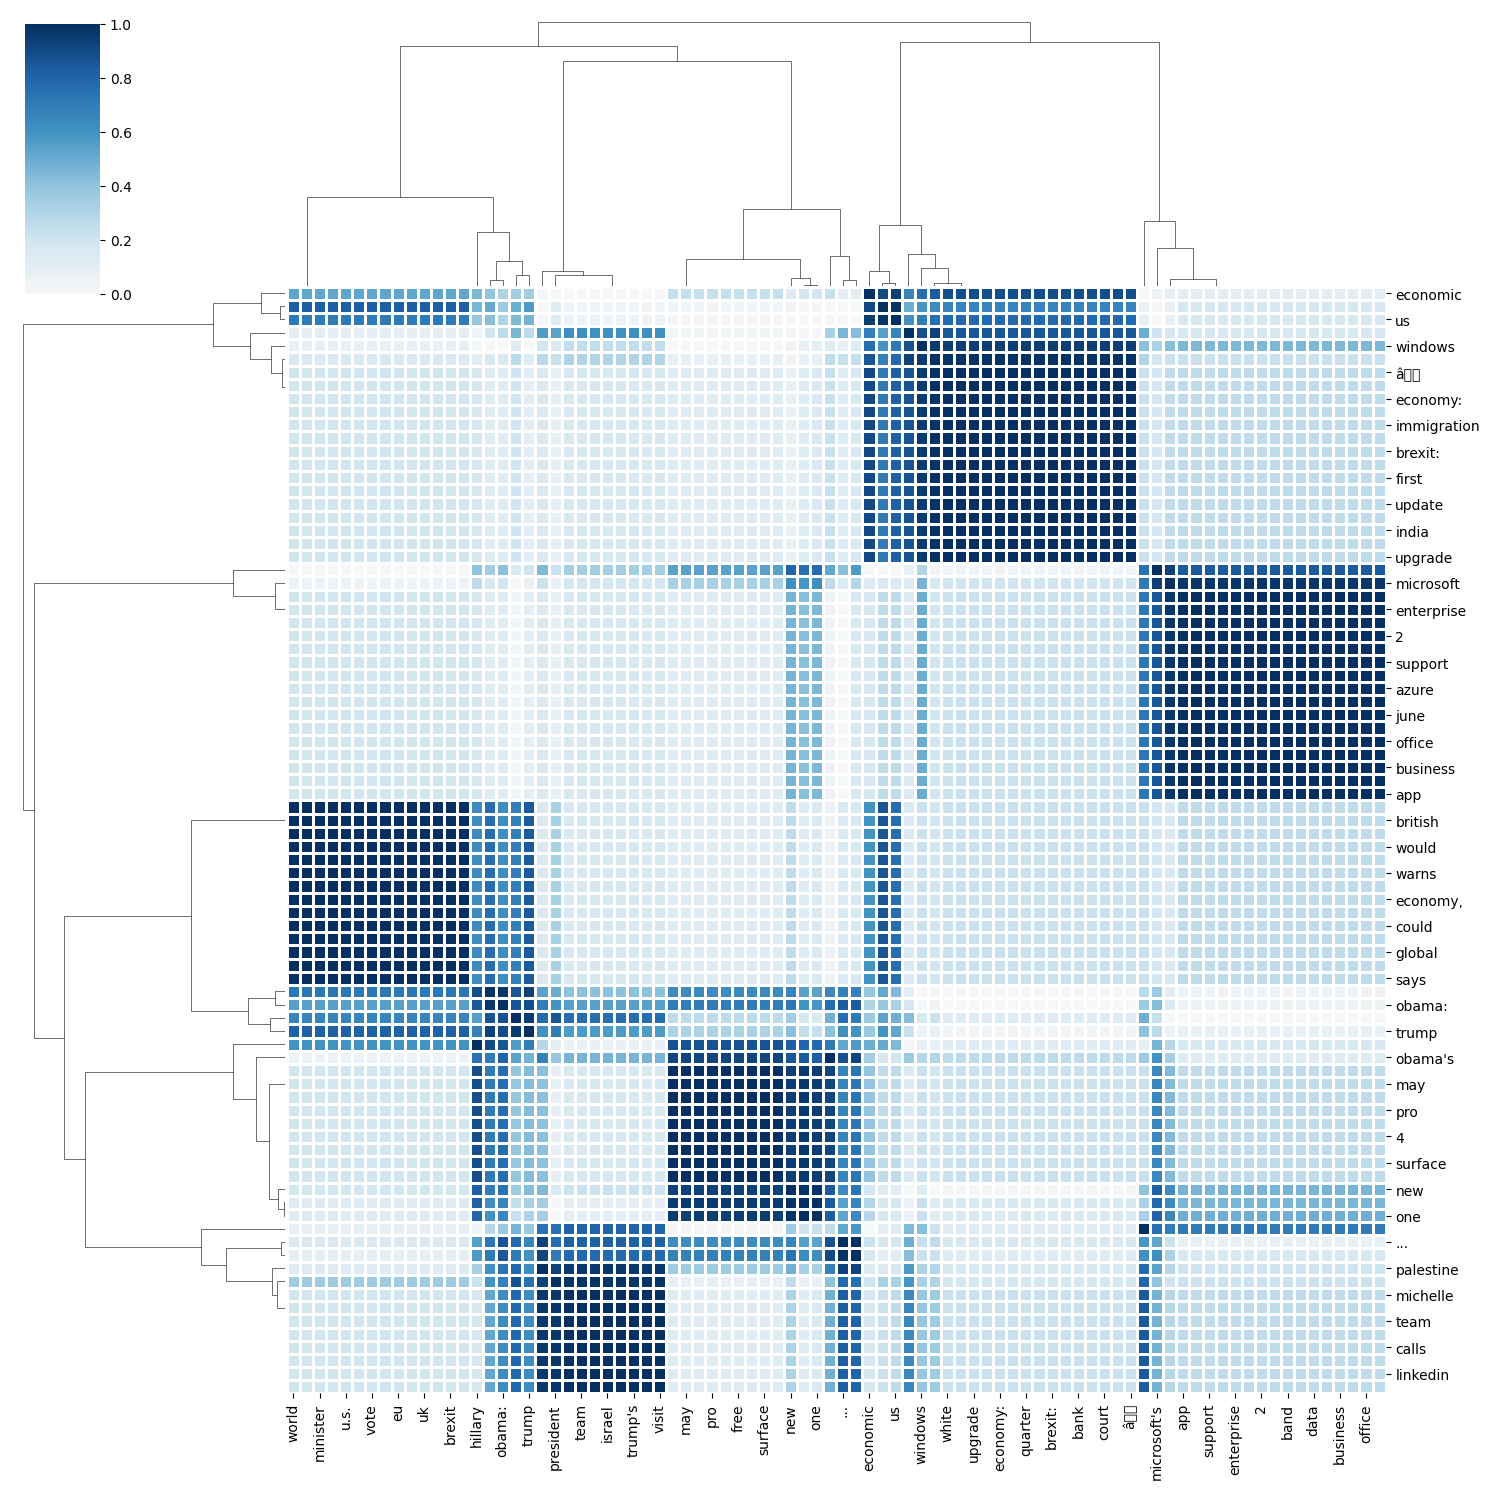

In [ ]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis